In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns

In [81]:
df=pd.read_csv("cardekho.csv",index_col=0)
df.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


CHECK FOR NULL VALUES

In [68]:
df.isnull().sum()

brand                0
model                0
min_cost_price       0
max_cost_price       0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

DROPPING COLUMN CAR NAME 

In [82]:
df.drop(['car_name'],axis=1,inplace=True)

VISUALISING BRAND COLUMN

WE will now be just visualising average in price for particular car brand. This just comes of simple intution that some brand of cars exclusively keeps the price higher.

In [83]:
df.loc[:,'brand'].value_counts()

Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: brand, dtype: int64

In [84]:
grouped_df = df.groupby("brand")
mean_df = grouped_df['selling_price'].mean()

mean_df = mean_df.reset_index()
print(mean_df)

            brand  selling_price
0            Audi   1.966865e+06
1             BMW   2.693827e+06
2         Bentley   9.266667e+06
3          Datsun   3.205176e+05
4         Ferrari   3.950000e+07
5           Force   7.000000e+05
6            Ford   6.452241e+05
7           Honda   6.177569e+05
8         Hyundai   5.761539e+05
9           ISUZU   1.897500e+06
10          Isuzu   1.355000e+06
11         Jaguar   2.643034e+06
12           Jeep   1.795805e+06
13            Kia   1.735250e+06
14     Land Rover   3.823902e+06
15          Lexus   5.146500e+06
16             MG   1.752947e+06
17       Mahindra   7.874550e+05
18         Maruti   4.870893e+05
19       Maserati   6.100000e+06
20   Mercedes-AMG   5.100000e+06
21  Mercedes-Benz   2.480742e+06
22           Mini   2.182647e+06
23         Nissan   9.553636e+05
24        Porsche   5.161190e+06
25        Renault   4.409851e+05
26    Rolls-Royce   2.420000e+07
27          Skoda   7.840898e+05
28           Tata   6.835349e+05
29        

In [85]:
brand_avg_price={}
for index, row in mean_df.iterrows():
    brand_avg_price[row['brand']]=row['selling_price']
df['brand'] = df['brand'].apply(lambda x: brand_avg_price[x])
df.head()

,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,487089.317909,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,576153.923541,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,576153.923541,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,487089.317909,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,645224.050633,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


VISUALISING VEHICLE AGE AND KM_DRIVEN COLUMN

Second I want to work on two categories Vehicle Age and km_driven ,in both cases more are the values ,lesser should be the selling price 

Vehicle Age 

In [86]:
max_val = df['vehicle_age'].max()
highest_val=max_val+5
df['vehicle_age'] = df['vehicle_age'].apply(lambda x:highest_val-x )
df['vehicle_age']

0        25
1        29
2        23
3        25
4        28
         ..
19537    25
19540    32
19541    28
19542    29
19543    32
Name: vehicle_age, Length: 15411, dtype: int64

In [87]:
max_val = df['km_driven'].max()
highest_val=max_val+50
df['km_driven'] = df['km_driven'].apply(lambda x:highest_val-x )
df['km_driven']

0        3680050
1        3780050
2        3740050
3        3763050
4        3770050
          ...   
19537    3789327
19540    3782050
19541    3733050
19542         50
19543    3787050
Name: km_driven, Length: 15411, dtype: int64

In [ ]:
df.describe()

Selecting col having categorical data type and numeric data type

In [88]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(include=['object']).columns.tolist()

print(num_cols)
print(cat_cols)

['brand', 'min_cost_price', 'max_cost_price', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
['model', 'seller_type', 'fuel_type', 'transmission_type']


###DATA VISUALISATION

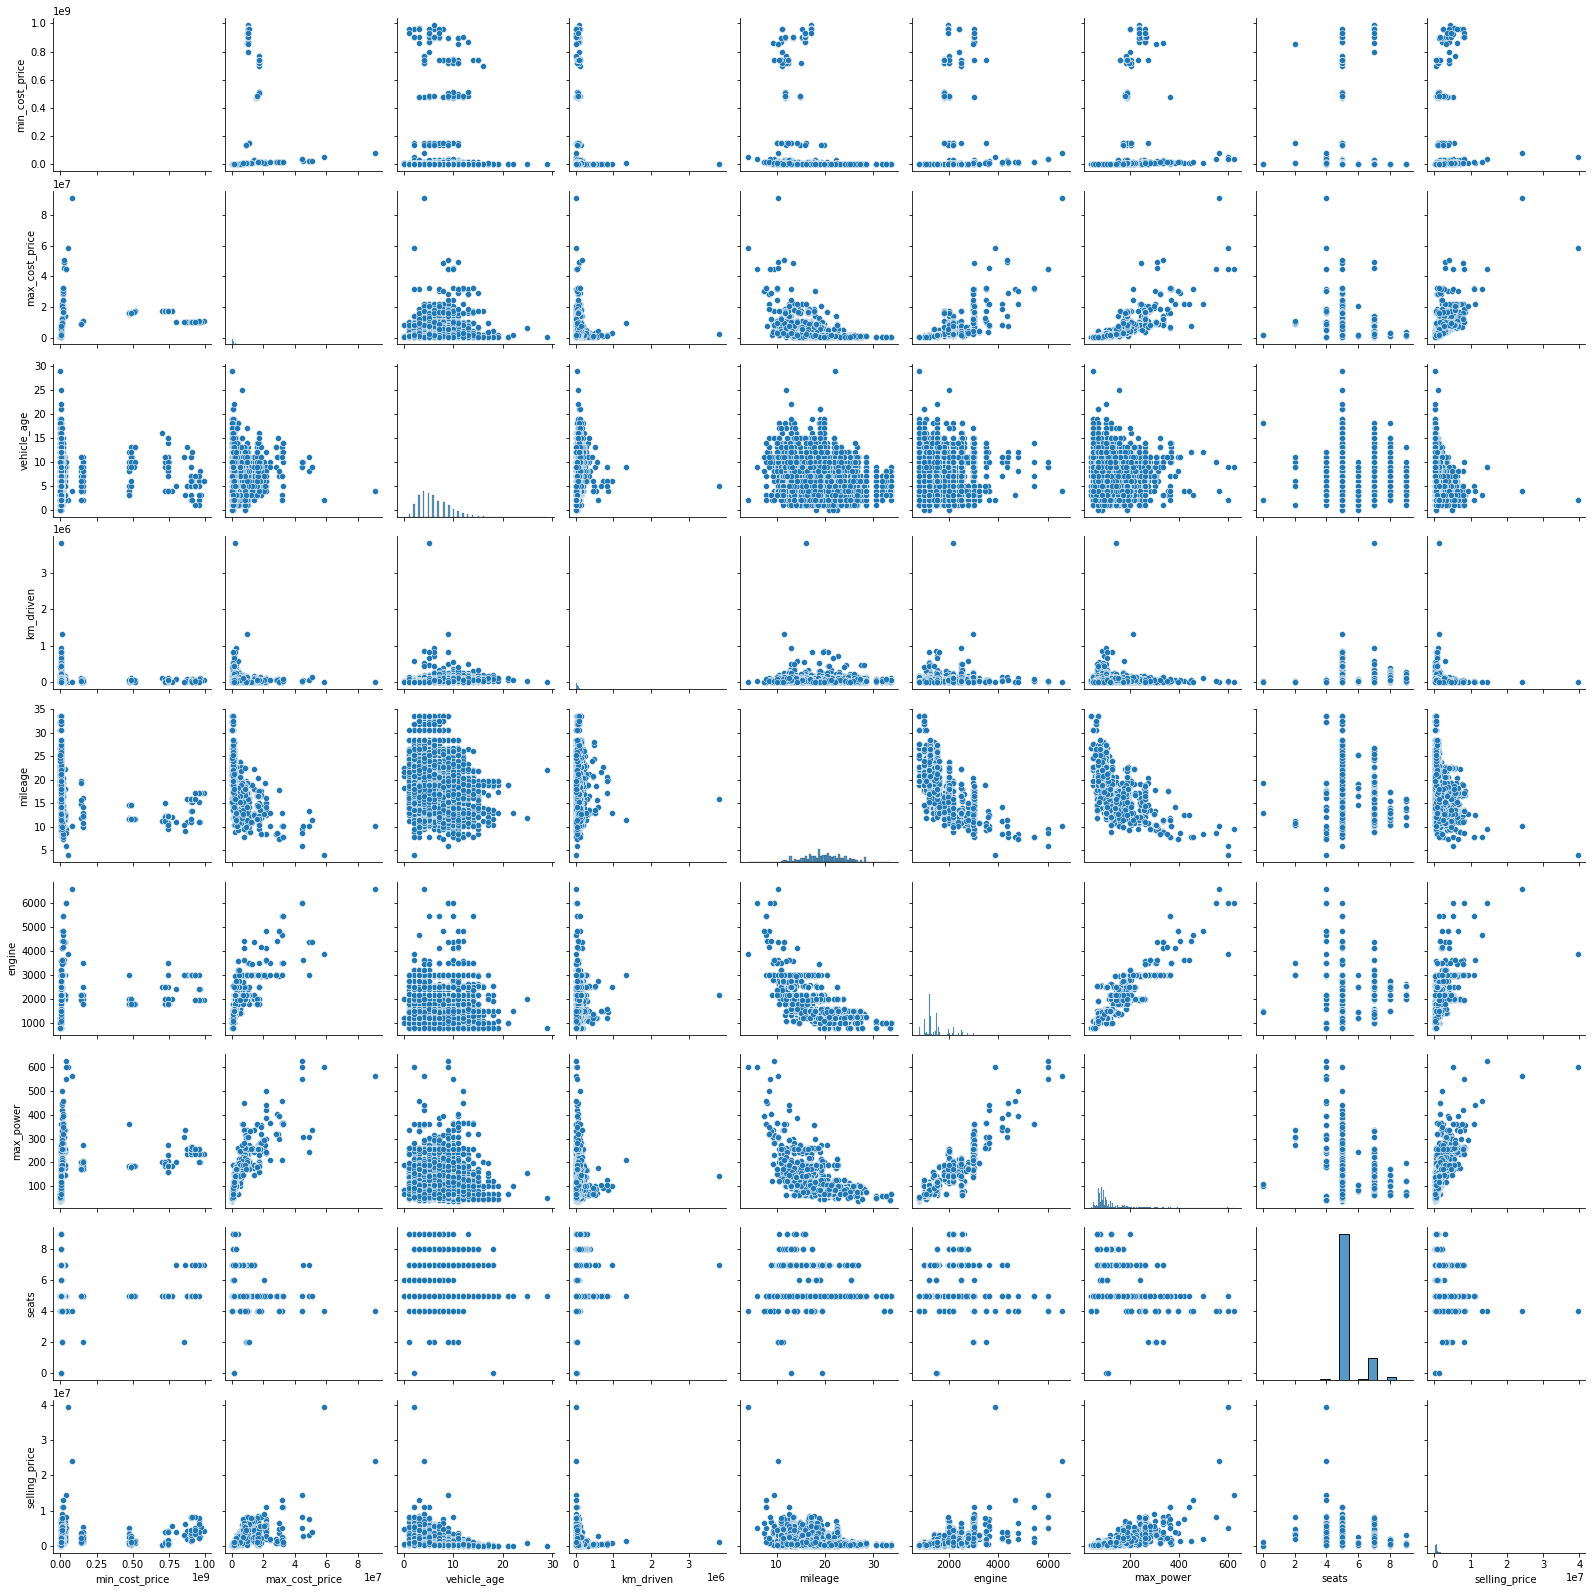

In [ ]:

sns.pairplot(df)

###ENCODING OF CATEGORICAL DATA

In [89]:
encoder_list=[]
for i in cat_cols:
  encoded=LabelEncoder().fit(df[i])
  encoder_list.append(encoded)
  df[i]=encoded.transform(df[i])

In [21]:
df.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,65,487089.317909,7,3.570039e+05,4.654015e+05,9,120000,1,4,1,19.70,796,46.30,5,120000
1,34,576153.923541,54,7.110000e+05,7.480000e+05,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,40,576153.923541,118,8.540829e+05,1.307926e+06,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,65,487089.317909,7,3.570039e+05,4.654015e+05,9,37000,1,4,1,20.92,998,67.10,5,226000
4,20,645224.050633,38,1.014000e+06,1.379000e+06,6,30000,0,1,1,22.77,1498,98.59,5,570000


###SCALING OF NUMERICAL DATA

In [90]:
scaler = preprocessing.MinMaxScaler()
sdf=scaler.fit_transform(df)
scaled_df = pd.DataFrame(sdf, columns=df.columns)

scaled_df.head()

,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0.004252,0.058824,0.000047,0.000324,0.689655,0.968447,0.5,1.00,1.0,0.531483,0.000517,0.013445,0.555556,0.002027
1,0.006525,0.453782,0.000405,0.003441,0.827586,0.994763,0.5,1.00,1.0,0.504401,0.069667,0.074200,0.555556,0.012924
2,0.006525,0.991597,0.000550,0.009617,0.620690,0.984236,0.5,1.00,1.0,0.440081,0.069667,0.070796,0.555556,0.004435
3,0.004252,0.058824,0.000047,0.000324,0.689655,0.990289,0.5,1.00,1.0,0.572783,0.035351,0.048843,0.555556,0.004714
4,0.008288,0.319328,0.000712,0.010401,0.793103,0.992131,0.0,0.25,1.0,0.635410,0.121573,0.102434,0.555556,0.013431


###LINEAR REGRESSION

In [91]:
from sklearn.linear_model import LinearRegression
x=scaled_df.iloc[:,:-1]
y=scaled_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y)
model=LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)

0.7212796966599677

###DECISION TREE REGRESSION

In [94]:
from sklearn.tree import DecisionTreeRegressor
x=scaled_df.iloc[:,:-1]
y=scaled_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y)
model=DecisionTreeRegressor().fit(x_train,y_train)
model.score(x_test,y_test)

0.9201968153545623